**Đề 3 tương ứng với Wednesday**

- Từ tập train, trích ra dòng có Publication_Day = Wednesday

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_train = pd.read_csv("data/train.csv")

df_train = df_train.loc[df_train['Publication_Day'] == 'Wednesday']
df_train.drop(columns=['Publication_Day'], inplace=True)

df_train

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
13,13,Gadget Geek,Episode 37,92.50,Technology,68.42,Afternoon,87.87,0.0,Neutral,50.93591
19,19,Sport Spot,Episode 61,51.60,Sports,61.60,Evening,90.41,1.0,Positive,14.96035
20,20,Funny Folks,Episode 100,54.67,Comedy,45.47,Afternoon,NaN,2.0,Neutral,29.22750
22,22,Business Briefs,Episode 54,66.22,Business,62.81,Night,88.86,0.0,Neutral,47.60142
25,25,Tech Trends,Episode 97,105.35,Technology,55.03,Afternoon,76.12,1.0,Neutral,99.15797
...,...,...,...,...,...,...,...,...,...,...,...
749968,749968,Tech Talks,Episode 26,38.79,Technology,52.36,Afternoon,NaN,0.0,Neutral,16.61857
749971,749971,News Roundup,Episode 48,42.43,News,46.80,Afternoon,27.33,2.0,Positive,23.24694
749974,749974,Tech Talks,Episode 94,57.39,Technology,40.66,Night,91.44,3.0,Negative,40.97805
749989,749989,Home & Living,Episode 78,97.51,Lifestyle,91.92,Evening,NaN,3.0,Neutral,56.44464


**Data Preprocess**
- Kiểm tra giá trị NaN

- Thay các giá trị NaN của từng cột bằng mean của chính nó

- Encode các cột có kiểu category

In [3]:
df_train.isna().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         12559
Genre                              0
Host_Popularity_percentage         0
Publication_Time                   0
Guest_Popularity_percentage    20755
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64

In [4]:
df_train = df_train.fillna(df_train.mean(numeric_only=True))

In [5]:
df_train.isna().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [6]:
# Encoding
categorical_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Time', 'Episode_Sentiment']
for col in categorical_cols:
    df_train.loc[:, col] = LabelEncoder().fit_transform(df_train[col])
df_train

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
13,13,16,31,92.50,8,68.42,0,87.870000,0.0,1,50.93591
19,19,37,58,51.60,7,61.60,1,90.410000,1.0,2,14.96035
20,20,15,2,54.67,1,45.47,0,52.427335,2.0,1,29.22750
22,22,2,50,66.22,0,62.81,3,88.860000,0.0,1,47.60142
25,25,43,97,105.35,8,55.03,0,76.120000,1.0,1,99.15797
...,...,...,...,...,...,...,...,...,...,...,...
749968,749968,42,19,38.79,8,52.36,0,52.427335,0.0,1,16.61857
749971,749971,35,43,42.43,6,46.80,0,27.330000,2.0,2,23.24694
749974,749974,42,94,57.39,8,40.66,3,91.440000,3.0,0,40.97805
749989,749989,21,76,97.51,4,91.92,1,52.427335,3.0,1,56.44464



**Triển khai 3 mô hình dự đoán khác nhau rồi kết hợp chúng thông qua Kalman Filter**

- Mô hình 1: Linear Regression
- Mô hình 2: Random Forest
- Mô hình 3: Gradient Boosting

*Prediction(t) = KalmanFilter(model1_(t), model_2(t), model_3(t))*

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=["id", "Listening_Time_minutes"])
y = df_train["Listening_Time_minutes"]

X_train_part, X_val, y_train_part, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model_gb = GradientBoostingRegressor(n_estimators=50, random_state=42)


model_lr.fit(X_train_part, y_train_part)
model_rf.fit(X_train_part, y_train_part)
model_gb.fit(X_train_part, y_train_part)


pred_lr = model_lr.predict(X_val)
pred_rf = model_rf.predict(X_val)
pred_gb = model_gb.predict(X_val)

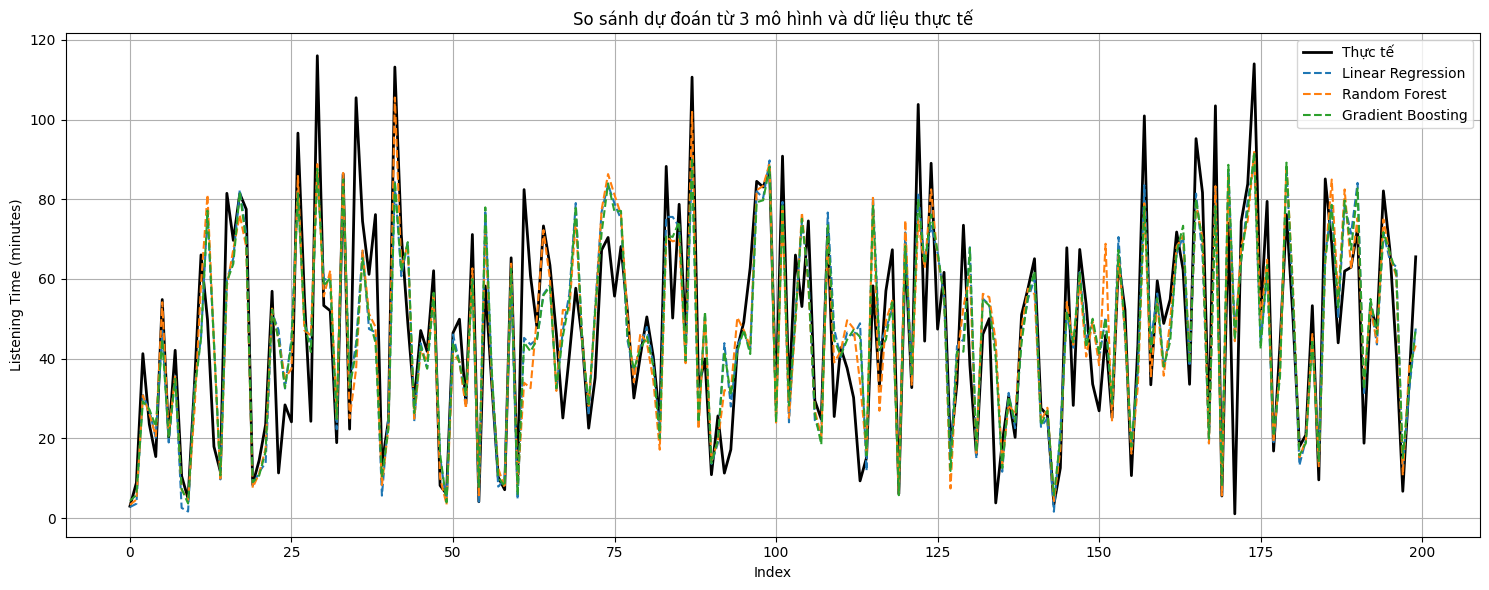

In [8]:
# Trực quan hóa 200 dữ liệu đầu tiên
plt.figure(figsize=(15, 6))
plt.plot(y_val.values[:200], label="Thực tế", color="black", linewidth=2)
plt.plot(pred_lr[:200], label="Linear Regression", linestyle="--")
plt.plot(pred_rf[:200], label="Random Forest", linestyle="--")
plt.plot(pred_gb[:200], label="Gradient Boosting", linestyle="--")
plt.title("So sánh dự đoán từ 3 mô hình và dữ liệu thực tế")
plt.xlabel("Index")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Thực hiện Kalman Filter và trực quan hóa kết quả


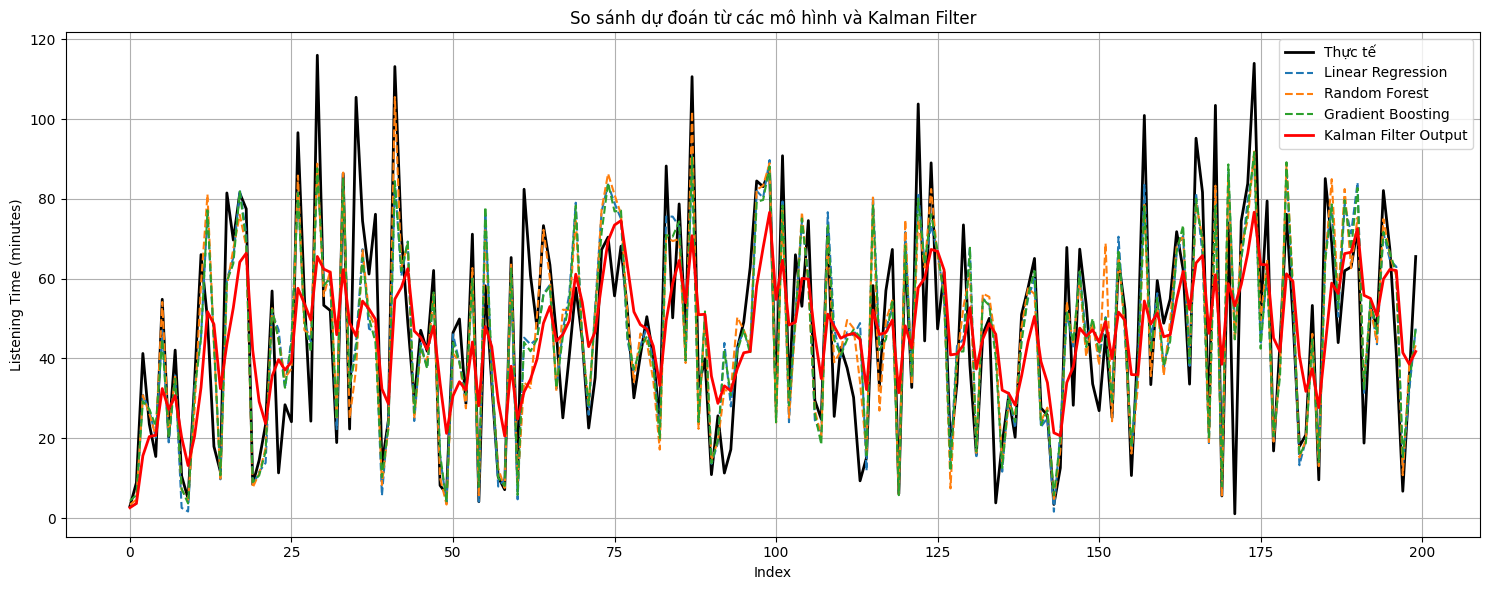

In [9]:
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

stacked_preds = np.vstack([pred_lr, pred_rf, pred_gb]).T

kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=np.array([[1], [1], [1]]),
    observation_covariance=np.eye(3),
    transition_covariance=0.1 * np.eye(1),
    initial_state_mean=0,
    initial_state_covariance=1
)

state_means, _ = kf.filter(stacked_preds)

plt.figure(figsize=(15, 6))
plt.plot(y_val.values[:200], label="Thực tế", color="black", linewidth=2)
plt.plot(pred_lr[:200], label="Linear Regression", linestyle="--")
plt.plot(pred_rf[:200], label="Random Forest", linestyle="--")
plt.plot(pred_gb[:200], label="Gradient Boosting", linestyle="--")
plt.plot(state_means[:200], label="Kalman Filter Output", color="red", linewidth=2)
plt.title("So sánh dự đoán từ các mô hình và Kalman Filter")
plt.xlabel("Index")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
